In [44]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
''' Data Augmentatioon'''
train_ds = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

''' flow from directory '''
train_ds = train_ds.flow_from_directory('training_set/training_set/', target_size=(64, 64), 
                                        batch_size=32, class_mode='binary')

Found 8005 images belonging to 2 classes.


In [4]:
''' Scaling '''
test_ds = ImageDataGenerator(rescale = 1./255)

''' flow from directory '''
test_ds = test_ds.flow_from_directory('test_set/test_set/', target_size=(64, 64), batch_size=32, 
                                      class_mode='binary')

Found 2023 images belonging to 2 classes.


In [5]:
''' container '''
model = tf.keras.models.Sequential()

In [6]:
''' addding layers to convtainer '''
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [7]:
''' adding max pool layer '''
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [8]:
''' 2nd convolutional layer '''
model.add(tf.keras.layers.Conv2D(filters = 32,kernel_size = 3, activation = 'relu'))

''' 2nd max pool layer '''
model.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

In [9]:
''' flattening '''
model.add(tf.keras.layers.Flatten())

In [10]:
''' Hidden Layer '''
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [11]:
''' classification layer '''
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [12]:
''' compile the model '''
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
''' training '''
model.fit(x=train_ds, validation_data=test_ds, epochs=25)

Epoch 1/25
251/251 [==============================] - 213s 841ms/step - loss: 0.6915 - accuracy: 0.5480 - val_loss: 0.6434 - val_accuracy: 0.6164
Epoch 2/25
251/251 [==============================] - 108s 431ms/step - loss: 0.6377 - accuracy: 0.6368 - val_loss: 0.6122 - val_accuracy: 0.6649
Epoch 3/25
251/251 [==============================] - 111s 443ms/step - loss: 0.5791 - accuracy: 0.6930 - val_loss: 0.6671 - val_accuracy: 0.6045
Epoch 4/25
251/251 [==============================] - 109s 435ms/step - loss: 0.5513 - accuracy: 0.7259 - val_loss: 0.5370 - val_accuracy: 0.7316
Epoch 5/25
251/251 [==============================] - 109s 434ms/step - loss: 0.5110 - accuracy: 0.7474 - val_loss: 0.4946 - val_accuracy: 0.7608
Epoch 6/25
251/251 [==============================] - 115s 456ms/step - loss: 0.4870 - accuracy: 0.7631 - val_loss: 0.5482 - val_accuracy: 0.7321
Epoch 7/25
251/251 [==============================] - 111s 441ms/step - loss: 0.4753 - accuracy: 0.7757 - val_loss: 0.4901 -

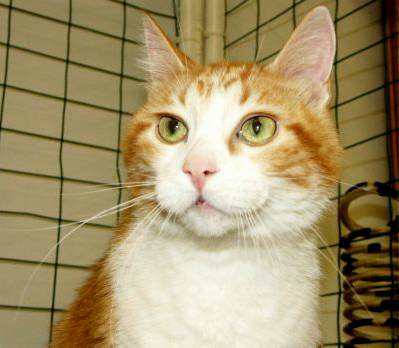

In [19]:
''' plotting cat image '''
image.load_img('training_set/training_set/cats/cat.1442.jpg')

In [32]:
''' prediction '''
test_img = image.load_img('training_set/training_set/cats/cat.1442.jpg', target_size = (64, 64))

''' converting image to array '''
img = image.img_to_array(test_img)

''' expanding dimension '''
img = np.expand_dims(img, axis=0)

''' prediction '''
r = model.predict(img)
train_ds.class_indices

if r[0][0] == 1:
    pred = 'dog'
else:
    pred = 'cat'

In [33]:
print(pred)

cat


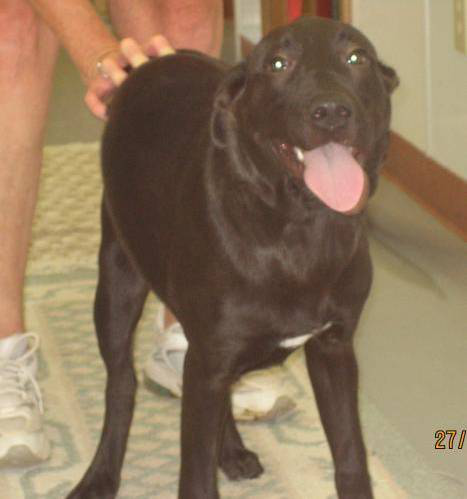

In [38]:
''' plotting dog image '''
image.load_img('training_set/training_set/dogs/dog.1281.jpg')

In [46]:
''' prediction '''
test_img = image.load_img('training_set/training_set/dogs/dog.1281.jpg', target_size = (64, 64))

''' converting image to array '''
img = image.img_to_array(test_img)

''' expanding dimension '''
img = np.expand_dims(img, axis = 0)

''' prediction '''
r = model.predict(img)

train_ds.class_indices

if r[0][0] == 1:
    pred = 'dog'
else:
    pred = 'cat'

In [47]:
print(pred)

dog
